In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

635

Get city weather data
-----------------------

In [6]:
# Import the requests library
import requests

# Import the API key from the config file
from config import weather_api_key

In [7]:
# Starting URL or Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [8]:
# Import the datetime module from the datetime library
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of hte logging
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1 #Should this be incrementing??
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to record count
    record_count += 1
    
    # ------------------------------------
    # Run an API request for each of teh cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        
        # Append the city information into city_data list
        city_data.append({"City":city.title(),
                         "Lat":city_lat,
                         "Lng":city_lng,
                         "Max Temp":city_max_temp,
                         "Humidity":city_humidity,
                         "Cloudiness":city_clouds,
                         "Wind Speed":city_wind,
                         "Country":city_country,
                         "Date":city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate that data loading is complete
print("---------------------------")
print("Data Retrieval Complete    ")
print("---------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | kismayo
Processing Record 4 of Set 1 | kiama
Processing Record 5 of Set 1 | morant bay
Processing Record 6 of Set 1 | torbay
Processing Record 7 of Set 1 | isangel
Processing Record 8 of Set 1 | limbang
Processing Record 9 of Set 1 | mehamn
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | kavieng
Processing Record 15 of Set 1 | puerto ayacucho
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 22 of Set 1 | havoysund
Processing Re

Processing Record 35 of Set 4 | longyearbyen
Processing Record 36 of Set 4 | korla
Processing Record 37 of Set 4 | bartlesville
Processing Record 38 of Set 4 | naze
Processing Record 39 of Set 4 | sitka
Processing Record 40 of Set 4 | pevek
Processing Record 41 of Set 4 | marawi
Processing Record 42 of Set 4 | half moon bay
Processing Record 43 of Set 4 | narsaq
Processing Record 44 of Set 4 | manta
Processing Record 45 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 46 of Set 4 | talcahuano
Processing Record 47 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 48 of Set 4 | victoria
Processing Record 49 of Set 4 | dolbeau
City not found. Skipping...
Processing Record 50 of Set 4 | pangnirtung
Processing Record 1 of Set 5 | requena
Processing Record 2 of Set 5 | hutchinson
Processing Record 3 of Set 5 | yulara
Processing Record 4 of Set 5 | tura
Processing Record 5 of Set 5 | corum
Processing Record 6 of Set 5 | burnie
Processing Record 7 of Set 5

Processing Record 25 of Set 8 | kasempa
Processing Record 26 of Set 8 | satitoa
City not found. Skipping...
Processing Record 27 of Set 8 | amapa
Processing Record 28 of Set 8 | columbia
Processing Record 29 of Set 8 | verkhnyaya inta
Processing Record 30 of Set 8 | encruzilhada do sul
Processing Record 31 of Set 8 | presidencia roque saenz pena
Processing Record 32 of Set 8 | olinda
Processing Record 33 of Set 8 | vredendal
Processing Record 34 of Set 8 | mozarlandia
Processing Record 35 of Set 8 | waingapu
Processing Record 36 of Set 8 | tala
Processing Record 37 of Set 8 | sept-iles
Processing Record 38 of Set 8 | muros
Processing Record 39 of Set 8 | goderich
Processing Record 40 of Set 8 | partenit
Processing Record 41 of Set 8 | sandane
Processing Record 42 of Set 8 | mount isa
Processing Record 43 of Set 8 | pontes e lacerda
Processing Record 44 of Set 8 | najran
Processing Record 45 of Set 8 | miraflores
Processing Record 46 of Set 8 | krasnoarmeysk
Processing Record 47 of Set 

Processing Record 12 of Set 12 | luan
Processing Record 13 of Set 12 | saint-augustin
Processing Record 14 of Set 12 | tongren
Processing Record 15 of Set 12 | whitley bay
Processing Record 16 of Set 12 | berlevag
Processing Record 17 of Set 12 | leeton
Processing Record 18 of Set 12 | inuvik
Processing Record 19 of Set 12 | solsvik
City not found. Skipping...
Processing Record 20 of Set 12 | coos bay
Processing Record 21 of Set 12 | alghero
Processing Record 22 of Set 12 | kizukuri
Processing Record 23 of Set 12 | kaset sombun
Processing Record 24 of Set 12 | biak
Processing Record 25 of Set 12 | azimur
City not found. Skipping...
Processing Record 26 of Set 12 | sarahan
Processing Record 27 of Set 12 | san pedro
Processing Record 28 of Set 12 | fare
Processing Record 29 of Set 12 | ambunti
Processing Record 30 of Set 12 | namatanai
Processing Record 31 of Set 12 | katsuura
Processing Record 32 of Set 12 | shasta lake
Processing Record 33 of Set 12 | mount pleasant
Processing Record 3

In [10]:
len(city_data)

581

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,79.70,74,48,15.28,PF,2021-03-25 02:21:21
1,Jamestown,42.0970,-79.2353,59.00,77,20,11.72,US,2021-03-25 02:24:40
2,Kismayo,-0.3582,42.5454,78.71,82,9,9.06,SO,2021-03-25 02:24:40
3,Kiama,-34.6833,150.8667,80.01,62,36,1.01,AU,2021-03-25 02:24:41
4,Morant Bay,17.8815,-76.4093,80.60,65,20,17.27,JM,2021-03-25 02:24:41
5,Torbay,47.6666,-52.7314,36.00,69,90,9.22,CA,2021-03-25 02:24:41
6,Isangel,-19.5500,169.2667,82.40,69,75,2.98,VU,2021-03-25 02:24:42
7,Limbang,4.7500,115.0000,87.80,74,75,2.30,MY,2021-03-25 02:24:42
8,Mehamn,71.0357,27.8492,27.28,85,95,4.07,NO,2021-03-25 02:24:42
9,New Norfolk,-42.7826,147.0587,66.00,68,100,3.00,AU,2021-03-25 02:24:43


In [12]:
# Reorder the dataframe
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-03-25 02:21:21,-23.1203,-134.9692,79.70,74,48,15.28
1,Jamestown,US,2021-03-25 02:24:40,42.0970,-79.2353,59.00,77,20,11.72
2,Kismayo,SO,2021-03-25 02:24:40,-0.3582,42.5454,78.71,82,9,9.06
3,Kiama,AU,2021-03-25 02:24:41,-34.6833,150.8667,80.01,62,36,1.01
4,Morant Bay,JM,2021-03-25 02:24:41,17.8815,-76.4093,80.60,65,20,17.27
5,Torbay,CA,2021-03-25 02:24:41,47.6666,-52.7314,36.00,69,90,9.22
6,Isangel,VU,2021-03-25 02:24:42,-19.5500,169.2667,82.40,69,75,2.98
7,Limbang,MY,2021-03-25 02:24:42,4.7500,115.0000,87.80,74,75,2.30
8,Mehamn,NO,2021-03-25 02:24:42,71.0357,27.8492,27.28,85,95,4.07
9,New Norfolk,AU,2021-03-25 02:24:43,-42.7826,147.0587,66.00,68,100,3.00


In [13]:
# Create the output file (CSV)
output_data_file = "Weather_data/cities.csv"

# Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

Create plots of weather data
--------------

In [14]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

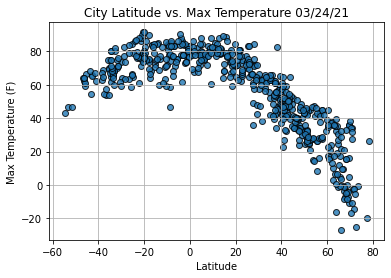

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incoroporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig1.png")

# Show plot
plt.show()

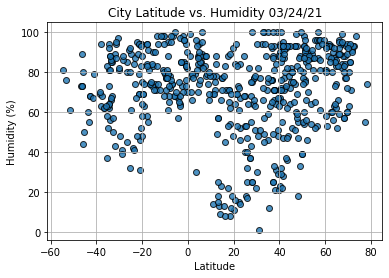

In [16]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incoroporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig2.png")

# Show plot
plt.show()

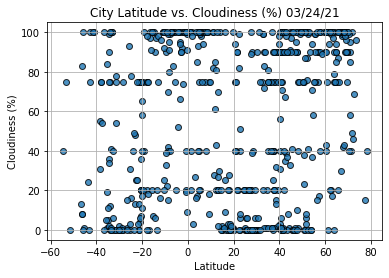

In [17]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incoroporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig3.png")

# Show plot
plt.show()

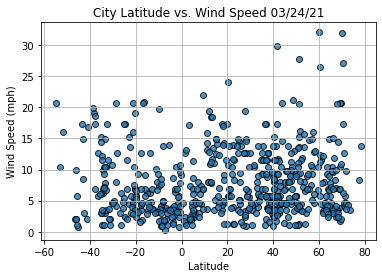

In [18]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incoroporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_data/Fig4.png")

# Show plot
plt.show()